# EN ESTA NOTEBOOK SE IMPLEMENTARÁ UN ARBOL DE DECISIÓN Y SE EVALUARÁN LOS RESULTADOS PARA EL PROYECTO





## MODELADO POR ARBOLES DE DECISIÓN

In [18]:
#importanción de librerías a utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#ARBOL DE DECISIÓN
from sklearn.tree import DecisionTreeClassifier   #usqar arbol de decision
from sklearn.model_selection import train_test_split    #permite dividir dataset
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score, confusion_matrix 
from sklearn.preprocessing import StandardScaler #  librería para escalar las variables independientes


In [19]:
# IMPORTACIÓN DEL DATASET REDUCIDO LUEGO DEL PROCESAMIENTO DE COLUMNAS

df = pd.read_csv('friesgo_2018_reduc.csv',  sep=',', encoding='utf-8')

df.head(5)

,id,region,tamanio_aglomerado_2,tamanio_aglomerado_3,tamanio_aglomerado_4,tipo_vivienda_2,tipo_vivienda_3,tipo_vivienda_4,tipo_vivienda_5,tipo_vivienda_6,...,consumo_5porc_fv_99,colesterol_alto,consumo_regular_riesgo,consumido_alcohol_2,consumido_alcohol_99,dijeron_diabetes,familiares_directos_diabetes_2,familiares_directos_diabetes_99,familiares_no_directos_diabetes_2,familiares_no_directos_diabetes_99
0,1128639,1,0,0,0,0,1,0,0,0,...,0,0,2.0,0,0,0,1,0,1,0
1,1709939,1,0,0,0,0,0,0,0,0,...,0,1,2.0,0,0,0,1,0,1,0
2,6874130,1,0,0,0,0,1,0,0,0,...,0,0,2.0,0,0,0,1,0,1,0
3,10319375,1,0,0,0,0,1,0,0,0,...,0,1,2.0,0,0,0,1,0,0,0
4,11140857,1,0,0,0,0,1,0,0,0,...,0,0,2.0,0,0,0,1,0,0,1


In [20]:
#Observamos columnas

df.columns


Index(['id', 'region', 'tamanio_aglomerado_2', 'tamanio_aglomerado_3',
       'tamanio_aglomerado_4', 'tipo_vivienda_2', 'tipo_vivienda_3',
       'tipo_vivienda_4', 'tipo_vivienda_5', 'tipo_vivienda_6',
       'tipo_vivienda_7', 'obtiene_gas_2', 'obtiene_gas_3', 'obtiene_gas_4',
       'obtiene_agua_2', 'obtiene_agua_3', 'obtiene_agua_4', 'obtiene_agua_5',
       'baño_1', 'baño_2', 'baño_3', 'baño_4', 'cant_componentes',
       'tipo_hogar_2', 'tipo_hogar_3', 'tipo_hogar_4', 'tipo_hogar_5',
       'tipo_hogar_6', 'tipo_hogar_7', 'tipo_hogar_8', 'ingresos',
       'asignaciones_2', 'asignaciones_99', 'edad', 'ascociado_Obra_social',
       'asociado_prepaga_porObra_social', 'asociado_prepaga',
       'asociado_servicio_emergencia', 'asociado_plan_estatal',
       'no_asociado_nada', 'obra_social_ns_nc', 'situacion_conyugal_2',
       'situacion_conyugal_3', 'situacion_conyugal_4', 'situacion_conyugal_5',
       'situacion_conyugal_6', 'nivel_instruccion_2', 'nivel_instruccion_3',
    

In [21]:
#muevo columnas de variables dependiendtes (enfermedades) al final

columnas_alFinal = [ 'dijeron_diabetes','veces_presion_alta', 'colesterol_alto']

df = df[[col for col in df if col not in columnas_alFinal] + columnas_alFinal]

print (df.iloc[:,-3:]) 

       dijeron_diabetes  veces_presion_alta  colesterol_alto
0                     0                   0                0
1                     0                   0                1
2                     0                   0                0
3                     0                   0                1
4                     0                   0                0
...                 ...                 ...              ...
25632                 0                   0                0
25633                 0                   1                1
25634                 0                   1                1
25635                 1                   0                0
25636                 1                   1                0

[25637 rows x 3 columns]


In [22]:
df.columns

Index(['id', 'region', 'tamanio_aglomerado_2', 'tamanio_aglomerado_3',
       'tamanio_aglomerado_4', 'tipo_vivienda_2', 'tipo_vivienda_3',
       'tipo_vivienda_4', 'tipo_vivienda_5', 'tipo_vivienda_6',
       'tipo_vivienda_7', 'obtiene_gas_2', 'obtiene_gas_3', 'obtiene_gas_4',
       'obtiene_agua_2', 'obtiene_agua_3', 'obtiene_agua_4', 'obtiene_agua_5',
       'baño_1', 'baño_2', 'baño_3', 'baño_4', 'cant_componentes',
       'tipo_hogar_2', 'tipo_hogar_3', 'tipo_hogar_4', 'tipo_hogar_5',
       'tipo_hogar_6', 'tipo_hogar_7', 'tipo_hogar_8', 'ingresos',
       'asignaciones_2', 'asignaciones_99', 'edad', 'ascociado_Obra_social',
       'asociado_prepaga_porObra_social', 'asociado_prepaga',
       'asociado_servicio_emergencia', 'asociado_plan_estatal',
       'no_asociado_nada', 'obra_social_ns_nc', 'situacion_conyugal_2',
       'situacion_conyugal_3', 'situacion_conyugal_4', 'situacion_conyugal_5',
       'situacion_conyugal_6', 'nivel_instruccion_2', 'nivel_instruccion_3',
    

In [23]:
#escalado a todo menos a regiones para entrega 3
#scaler = StandardScaler()
#columna_no_escalar = df['region']
#columnas_a_escalar = df.drop(columns=['region'])
#columnas_escaladas = scaler.fit_transform(columnas_a_escalar)
#df_escalado = pd.DataFrame(columnas_escaladas, columns=columnas_a_escalar.columns)

#df= pd.concat([df_escalado, columna_no_escalar], axis=1)

In [24]:
# Lista de las regiones que se encuentran en el dataset

regiones = df['region'].unique()
print(regiones)

[1 2 3 4 5 6]


In [25]:
# Crear un diccionario para almacenar los DataFrames por región

dfs_por_region = {}

In [26]:
# Iterar sobre cada región y guardar un nuevo DF por cada una

for region in regiones:
    # Filtrar los datos por la región actual
    df_region = df[df['region'] == region]
    # Guardar el DataFrame en el diccionario usando la región como clave
    dfs_por_region[region] = df_region

In [27]:

#funcion para calcular metricas por cada región y para cada enfermedad

def metricas(y_pred, y_test, enfermedad, region_actual):
        global resultados_por_region
        exactitud = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        sensibilidad = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        confusion = confusion_matrix(y_test, y_pred)

        # Inicializar las claves si no existen
        if enfermedad not in resultados_por_region:
            resultados_por_region[enfermedad] = {}
        if region_actual not in resultados_por_region[enfermedad]:
            resultados_por_region[enfermedad][region_actual] = {}
        
        
        resultados_por_region[enfermedad][region_actual]={
            'exactitud':exactitud,
            'precision':precision,
            'sensibilidad':sensibilidad,
            'f1': f1,
            'confusion': confusion
        }
        
        
        

In [28]:
# Crear diccionarios para almacenar modelos y resultados por región
modelos_por_region = {}
resultados_por_region = {}
importancia_por_region = {}



# Iterar sobre cada región para entrenar y evaluar modelos
for region in regiones:
    # Obtener el DataFrame de la región actual
    df_region = dfs_por_region[region]
    
    # Variables independientes
    X_region = df_region.iloc[:, 1:-3]  # Todas las columnas menos las últimas tres y la primera (id)
    
    # Variables dependientes
    y_region_colesterol = df_region['colesterol_alto']
    y_region_diabetes = df_region['dijeron_diabetes']
    y_region_hipertension = df_region['veces_presion_alta']

    # Dividir los datos en conjuntos de entrenamiento y prueba para cada enfermedad
    X_train_col, X_test_col, y_train_col, y_test_col = train_test_split(X_region, y_region_colesterol, test_size=0.25, random_state=0)
    X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X_region, y_region_diabetes, test_size=0.25, random_state=0)
    X_train_hip, X_test_hip, y_train_hip, y_test_hip = train_test_split(X_region, y_region_hipertension, test_size=0.25, random_state=0)
    
    # Crear y entrenar el modelo de árbol de decisión para cada enfermedad
    clf_col = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=4)
    clf_col.fit(X_train_col, y_train_col)
    
    clf_dia = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=4)
    clf_dia.fit(X_train_dia, y_train_dia)
    
    clf_hip = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=4)
    clf_hip.fit(X_train_hip, y_train_hip)

  
    # Almacenar los modelos y sus resultados por región
    modelos_por_region[region] = {
        'colesterol': clf_col,
        'diabetes': clf_dia,
        'hipertension': clf_hip
    }

         
    #importancia de cada columna en el modelo entrenado
    importances_col = clf_col.feature_importances_
    importances_dia = clf_dia.feature_importances_
    importances_hip = clf_hip.feature_importances_
    
    importancia_por_region[region]={
        'colesterol': importances_col,
        'diabetes': importances_dia,
        'hipertension': importances_hip  
    }
      
        
    # Probar modelo con conjunto de prueba
    y_pred_col = clf_col.predict(X_test_col)
    y_pred_dia = clf_dia.predict(X_test_dia)
    y_pred_hip = clf_hip.predict(X_test_hip)
  
    
    
    ## METRICAS DE EVALUACIÓN   ##############33
    metricas(y_pred_col, y_test_col, 'colesterol', region)
    metricas(y_pred_dia, y_test_dia, 'diabetes', region)
    metricas(y_pred_hip, y_test_hip, 'hipertension', region)
    

  ## CÁLCULOS DE EXACTITUD, PRECISIÓN, SENSIBILIDAD, F1-Score Y MATRIZ DE CONFUSIÓN POR CADA ENFERMEDAD Y POR CADA REGIÓN 

In [29]:
region_dict = {
    1: 'Metropolitana',
    2: 'Pampeana',
    3: 'Noroeste',
    4: 'Noreste',
    5: 'Cuyo',
    6: 'Patagónica'
}



In [30]:
# Mostrar los resultados por enfermedad y por región

for enfermedad, regiones in resultados_por_region.items():
    for region, resultados in regiones.items():

        nombre_region = region_dict.get(region, f"Región {region}")
        print(f"Enfermedad: {enfermedad}")
        print(f"Región: {nombre_region}")
        print(f"Exactitud del modelo: {resultados['exactitud']:.4f}")
        print(f"Precision del modelo: {resultados['precision']:.4f}")
        print(f"Sensibilidad del modelo: {resultados['sensibilidad']:.4f}")
        print(f"f1 del modelo: {resultados['f1']:.4f}")
        print(f"Matriz de confusion del modelo: \n{resultados['confusion']}\n")



Enfermedad: colesterol
Región: Metropolitana
Exactitud del modelo: 0.7346
Precision del modelo: 0.5396
Sensibilidad del modelo: 0.7346
f1 del modelo: 0.6222
Matriz de confusion del modelo: 
[[595   0]
 [215   0]]

Enfermedad: colesterol
Región: Pampeana
Exactitud del modelo: 0.7890
Precision del modelo: 0.6951
Sensibilidad del modelo: 0.7890
f1 del modelo: 0.6999
Matriz de confusion del modelo: 
[[1631    6]
 [ 431    3]]

Enfermedad: colesterol
Región: Noroeste
Exactitud del modelo: 0.7768
Precision del modelo: 0.7396
Sensibilidad del modelo: 0.7768
f1 del modelo: 0.7493
Matriz de confusion del modelo: 
[[848  73]
 [187  57]]

Enfermedad: colesterol
Región: Noreste
Exactitud del modelo: 0.8034
Precision del modelo: 0.7667
Sensibilidad del modelo: 0.8034
f1 del modelo: 0.7727
Matriz de confusion del modelo: 
[[669  40]
 [133  38]]

Enfermedad: colesterol
Región: Cuyo
Exactitud del modelo: 0.7368
Precision del modelo: 0.6907
Sensibilidad del modelo: 0.7368
f1 del modelo: 0.6664
Matriz d

## Conclusiones de análisis de los modelos:

<u>RESPECTO A COLESTEROL<u>
1. En general se observa que la mayoría de las MC (matriz de confusión) tienen muchos VERDADEROS NEGATIVOS y FALSOS NEGATIVOS y pocos VERDADEROS Y FALSOS POSITIVOS  lo que indica que predice poco la ocurrencia de colesterol (baja precisión y baja sensibil)
2. En general las metricas están por debajo de 70 excepto Noreste que tienen mejores metricas
    
<u>RESPECTO A DIABETES<u>
1. Todos los modelos tienen mejores métricas. 
2. EN general la precisión es la de menor valor (pocos verdaderos positivos y muchos falsos positivos)
3. Se debe tener en cuenta que la Diabetes es la de menor ocurrencia

<u>RESPECTO A HIPERTENSIÓN<u>
1. Se observa mejor  proporción de valores VERDADERO POSITIVO Y VERDADERO NEGATIVO 
2. Las metricas tienen bajos resultados ya que se observa que también hay considerables FALSOS POSITIVOS Y FALSOS NEGATIVOS (baja precisión, baja sensibilidad, etc)
    
  

 ## CALCULOS DE LA IMPORTANCIA DE CADA CARACTERÍSTICA ANALIZADA (VARIABLES INDEPENDIENTES) EN EL MODELO QUE PERMITE DETERMINAR LA EXISTENCIA O NO DE LAS ENFERMEDADES CONSIDERADAS (COLESTEROL, DIABETES E HIPERTENSIÓN) 

### CARACTERÍSTICAS MÁS IMPORTANTES EN LA DETERMINACIÓN DEL COLESTEROL SEPARADAS POR REGIÓN

In [53]:

# Crear un DataFrame vacío para almacenar las importancias
importancias_colesterol_df = pd.DataFrame(columns=['Region', 'Variable', 'Importancia'])


for region, importancias in importancia_por_region.items():
    # Obtener la importancia de colesterol de la región actual
    importances_col = importancias['colesterol']
    
    # Obtener el DataFrame de la región actual para obtener los nombres de las columnas
    df_region = dfs_por_region[region]
    X_region = df_region.iloc[:, 1:-3]
    columnas_originales = X_region.columns
    
    # Ordenar los índices de las importancias de mayor a menor
    indices_ordenados = np.argsort(importances_col)[::-1]
    
    # Obtener el nombre de la región
    nombre_region = region_dict.get(region, f"Región {region}")
    
    # Imprimir los resultados
    print(f"Región: {nombre_region}")
    for i in indices_ordenados:
        if importances_col[i] > 0.05:  # solo imprimo columnas con importancia mayor a 0
                                 
            print(f"{columnas_originales[i]}: {importances_col[i]:.4f}")
            
            importancias_colesterol_df = importancias_colesterol_df.append({
                'Region': nombre_region,
                'Variable': columnas_originales[i],
                'Importancia': importances_col[i]     
            }, ignore_index=True)
            
    print("\n")    
    
    

Región: Metropolitana
edad: 0.1597


Región: Pampeana
profesional_indica_sobrepeso: 0.1094
situacion_conyugal_6: 0.0723
asignaciones_2: 0.0715


Región: Noroeste
edad: 0.1490
asignaciones_2: 0.0543


Región: Noreste
profesional_indica_sobrepeso: 0.1259
edad: 0.1243
situacion_conyugal_6: 0.0687
ascociado_Obra_social: 0.0617
sexo_2: 0.0572


Región: Cuyo
no_asociado_nada: 0.1046
asignaciones_2: 0.0684
altura_cm: 0.0532
situacion_conyugal_6: 0.0524


Región: Patagónica
edad: 0.0761




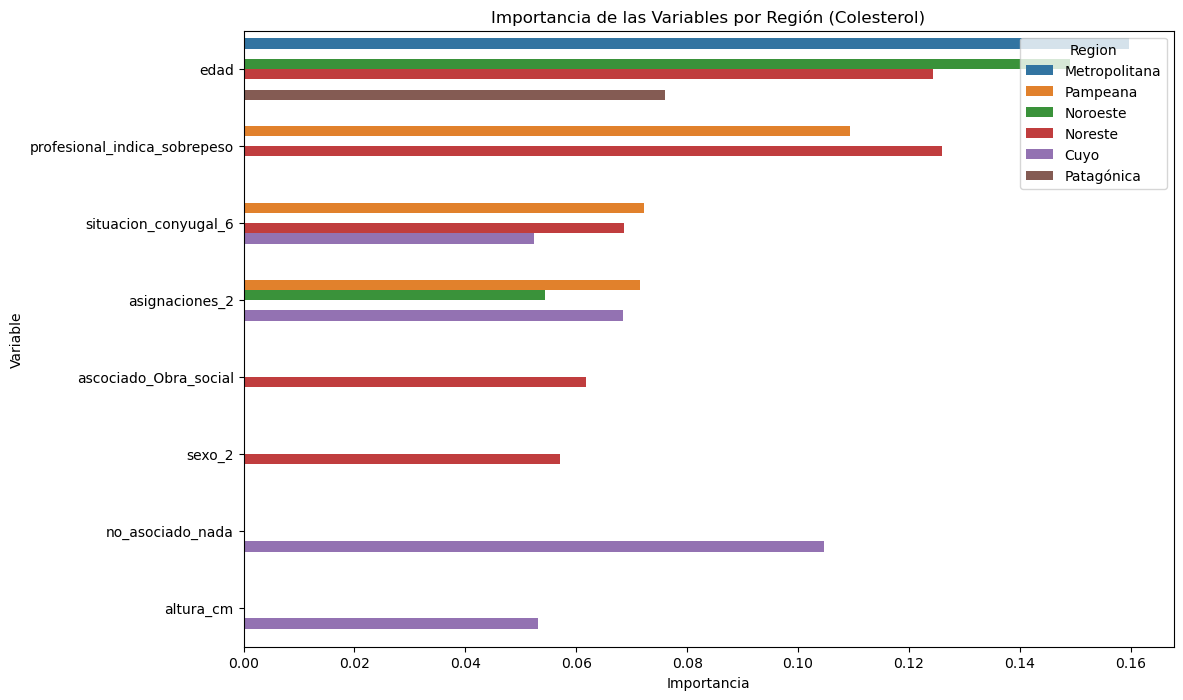

In [54]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', hue='Region', data=importancias_colesterol_df)
plt.title('Importancia de las Variables por Región (Colesterol)')
plt.show()

### Conclusiones: 

1. Se observa que de forma previsible la edad y el sobrepeso son factores importantes en cualquier región.
2. En la región PATAGÖNICA aparece com un factor importante la cantidad de minutos sentado y caminata. Se debe realizar un análisis en profundidad para determinar los valores en estas variables.
3. El ingreso parece ser una variables de gran importancia en el área metropolitana indicando que pueden haber diferencias significativas en este aspecto.


### CARACTERÍSTICAS MÁS IMPORTANTES EN LA DETERMINACIÓN DE LA HIPERTENSIÓN SEPARADAS POR REGIÓN

In [56]:

# Crear un DataFrame vacío para almacenar las importancias
importancias_hipertension_df = pd.DataFrame(columns=['Region', 'Variable', 'Importancia'])


for region, importancias in importancia_por_region.items():
    # Obtener la importancia de colesterol de la región actual
    importances_hip = importancias['hipertension']
    
    # Obtener el DataFrame de la región actual para obtener los nombres de las columnas
    df_region = dfs_por_region[region]
    X_region = df_region.iloc[:, 1:-3]
    columnas_originales = X_region.columns
    
    # Ordenar los índices de las importancias de mayor a menor
    indices_ordenados = np.argsort(importances_hip)[::-1]
    
    # Obtener el nombre de la región
    nombre_region = region_dict.get(region, f"Región {region}")
    
    # Imprimir los resultados
    print(f"Región: {nombre_region}")
    for i in indices_ordenados:
        if importances_hip[i] > 0.05:  # solo imprimo columnas con importancia mayor a 0
                    
            print(f"{columnas_originales[i]}: {importances_hip[i]:.4f}")
            
            importancias_hipertension_df = importancias_hipertension_df.append({
                'Region': nombre_region,
                'Variable': columnas_originales[i],
                'Importancia': importances_hip[i]     
            }, ignore_index=True)
            
    print("\n") 






Región: Metropolitana
edad: 0.2040
situacion_conyugal_6: 0.0932
peso_kg: 0.0609


Región: Pampeana
edad: 0.3180
peso_kg: 0.0757
altura_cm: 0.0610
ingresos: 0.0604
profesional_indica_sobrepeso: 0.0515


Región: Noroeste
edad: 0.0777
profesional_indica_sobrepeso: 0.0527
situacion_conyugal_6: 0.0506


Región: Noreste
edad: 0.2430
profesional_indica_sobrepeso: 0.0800
situacion_conyugal_5: 0.0672


Región: Cuyo
edad: 0.2870
peso_kg: 0.0868
profesional_indica_sobrepeso: 0.0637
promedio_fv_diario: 0.0531
altura_cm: 0.0513


Región: Patagónica
edad: 0.1757




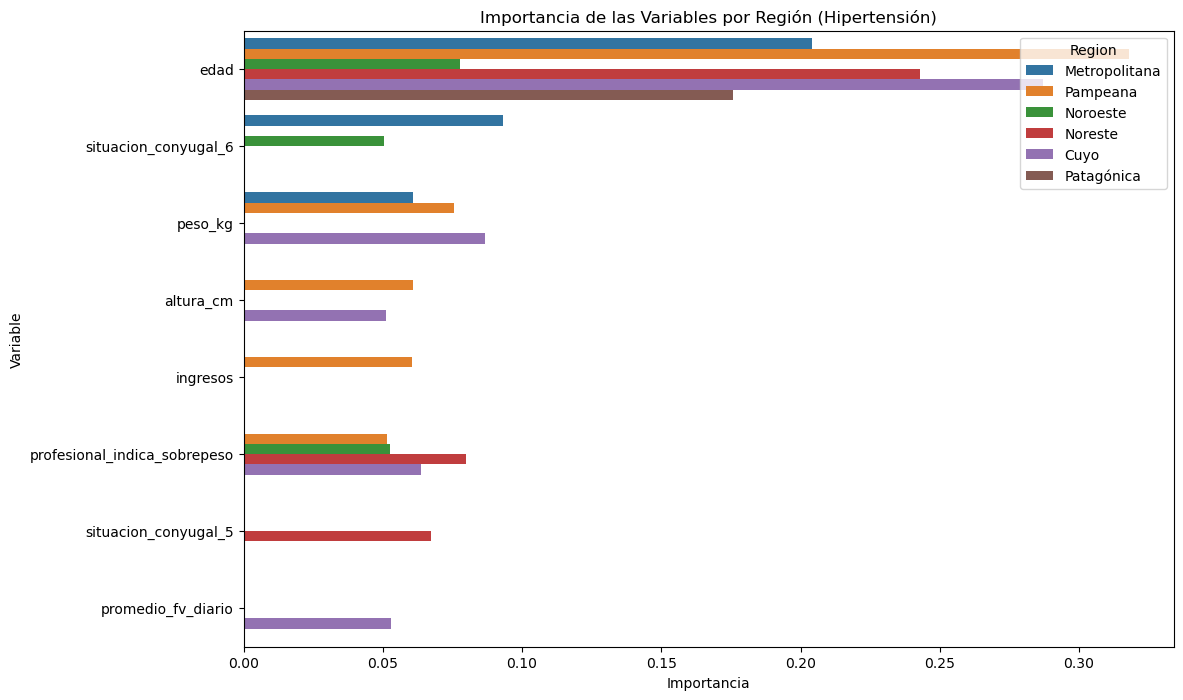

In [57]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', hue='Region', data=importancias_hipertension_df)
plt.title('Importancia de las Variables por Región (Hipertensión)')
plt.show()

### Conclusiones causas Hipertensión: 

1. Nuevamente se observa que la edad y el sobrepeso son variables importantes y generales en todas las regiones
2. En el Noroeste aparece como significativa la ocurrencia de familiares con diabetes en la determinación lo cual resulta llamativo ya que se está determinando la hipertensión. 
3. En el área Metropolitana, nuevamente el nivel de ingresos resultan significativos indicando diferencias importantes en este aspecto. Aparece también la cantidad de minutos sentado por día
4. Se observa en el Noreste una diferencia entre sexos
5. En  la patagonia el nivel de instrucción es significativo en la determinación de la hipertensión, tal vez por el tipo de trabajos u horas trabajadas, resposabilidades, etc.


### CARACTERÍSTICAS MÁS IMPORTANTES EN LA DETERMINACIÓN DE LA DIABETES SEPARADAS POR REGIÓN

In [58]:

# Crear un DataFrame vacío para almacenar las importancias
importancias_diabetes_df = pd.DataFrame(columns=['Region', 'Variable', 'Importancia'])

for region, importancias in importancia_por_region.items():
    # Obtener la importancia de colesterol de la región actual
    importances_dia = importancias['diabetes']
    
    # Obtener el DataFrame de la región actual para obtener los nombres de las columnas
    df_region = dfs_por_region[region]
    X_region = df_region.iloc[:, 1:-3]
    columnas_originales = X_region.columns
    
    # Ordenar los índices de las importancias de mayor a menor
    indices_ordenados = np.argsort(importances_dia)[::-1]
    
    # Obtener el nombre de la región
    nombre_region = region_dict.get(region, f"Región {region}")
    
   
    
    # Imprimir los resultados
    print(f"Región: {nombre_region}")
    for i in indices_ordenados:
        if importances_dia[i] > 0.05:  # solo imprimo columnas con importancia mayor a 0
            print(f"{columnas_originales[i]}: {importances_dia[i]:.4f}")
            
            importancias_diabetes_df = importancias_diabetes_df.append({
                'Region': nombre_region,
                'Variable': columnas_originales[i],
                'Importancia': importances_dia[i]     
            }, ignore_index=True)
    print("\n")


Región: Metropolitana
familiares_directos_diabetes_2: 0.1054
edad_fumo_primera_vez: 0.0514


Región: Pampeana
familiares_directos_diabetes_2: 0.1413
situacion_conyugal_6: 0.0515


Región: Noroeste
familiares_directos_diabetes_2: 0.0750
situacion_conyugal_6: 0.0560


Región: Noreste
familiares_directos_diabetes_2: 0.0995
edad: 0.0863
af_fue_traslado: 0.0659


Región: Cuyo
familiares_directos_diabetes_2: 0.1372


Región: Patagónica
familiares_directos_diabetes_2: 0.0746
sexo_2: 0.0542
profesional_indica_sobrepeso: 0.0513




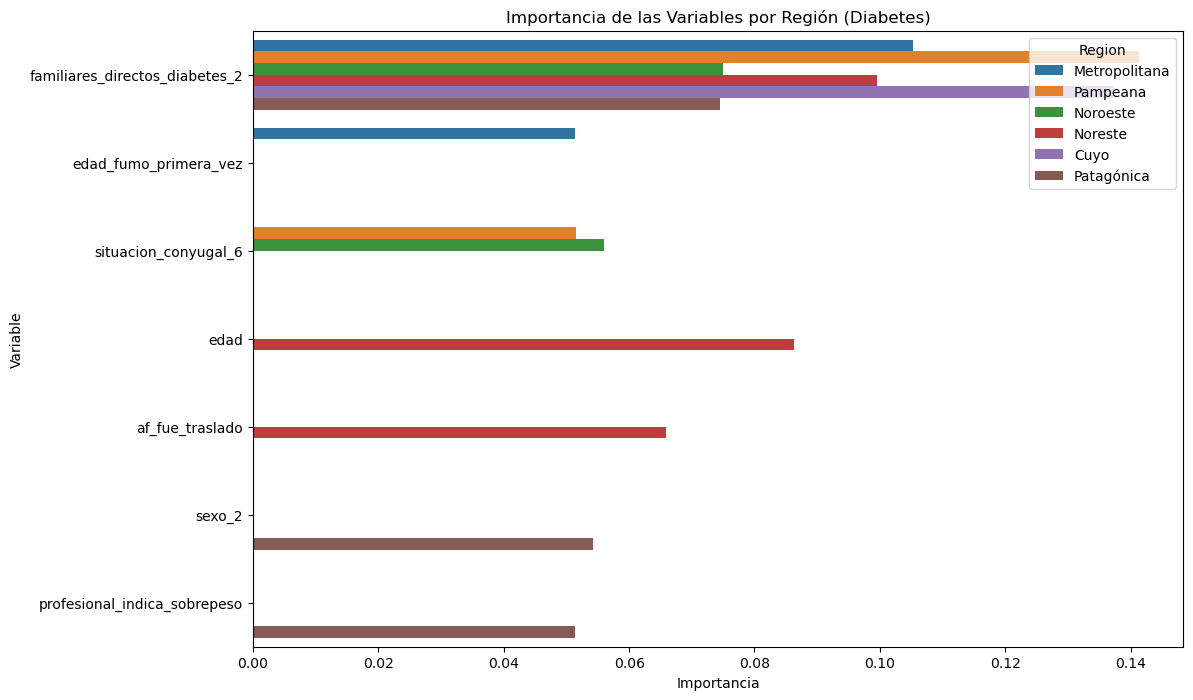

In [59]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', hue='Region', data=importancias_diabetes_df)
plt.title('Importancia de las Variables por Región (Diabetes)')
plt.show()

### Conclusiones causas Diabetes:

1. Se observan las variables edad y el peso como importantes en la mayoría de las regiones.
2. La variable familiares directos con diabetes resulta significativa en la mayoría de las regiones indicando que existe posiblemente un componente hereditario en la mayoría de los casos de diabetes.
3. En la región de cuyo es importante el nivel de actividad física y la cantidad de compoentes en la familia, similar al Noreste
4. En el Noreste los familiares no directos con diabetes también son significativs (posible indicación de habitos comunes).

# OPTIMIZACIÓN DE HIPERPARÁMETROS PARA MEJORAR EL MODELO

Se optimizarán los hiperparámetros con el objetivo de buscar mejorar las métricas y que los modelos sean capaces de predecir mejor las enfermedades (especialmente la hipertensión y el colesterol que tuvieron los peores resultados) y de esta forma encontrar las causas reales (o corroborar que eran las mismas)

In [37]:
#importación librería

from sklearn.model_selection import GridSearchCV #para optimizar hiperparámetros

In [38]:
#definimos grilla de hiperparámetros


param_grid = {
    'criterion': ['gini', 'entropy'],   #funcion para medir la calidad de la division
    'splitter': ['best', 'random'],     #estratedia para dividir cada nodo
    'max_depth': [None, 10, 20, 30, 40, 50],    #profundidad máxima del arbol
    'min_samples_split': [2, 5, 10],      #numero minimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],         #numero minimo de muestras para estar en un nodo hoja
    'max_features': [None, 'sqrt', 'log2']   #numero de caracteristicas a considerar para buscar ña mejor division
}

 

In [39]:
# Crear diccionarios para almacenar modelos y resultados por región
modelos_por_region = {}
resultados_por_region = {}
importancia_por_region = {}



# Iterar sobre cada región para entrenar y evaluar modelos
for region in regiones:
    # Obtener el DataFrame de la región actual
    df_region = dfs_por_region[region]
    
    # Variables independientes
    X_region = df_region.iloc[:, 1:-3]  # Todas las columnas menos las últimas tres y la primera (id)
    
    # Variables dependientes
    y_region_colesterol = df_region['colesterol_alto']
    y_region_diabetes = df_region['dijeron_diabetes']
    y_region_hipertension = df_region['veces_presion_alta']

    # Dividir los datos en conjuntos de entrenamiento y prueba para cada enfermedad
    X_train_col, X_test_col, y_train_col, y_test_col = train_test_split(X_region, y_region_colesterol, test_size=0.25, random_state=0)
    X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X_region, y_region_diabetes, test_size=0.25, random_state=0)
    X_train_hip, X_test_hip, y_train_hip, y_test_hip = train_test_split(X_region, y_region_hipertension, test_size=0.25, random_state=0)
    
    # Crear y entrenar el modelo de árbol de decisión para cada enfermedad usando GRIDSEARCH
    clf_col = DecisionTreeClassifier(random_state=0)
    grid_search_col =  GridSearchCV(estimator=clf_col, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search_col.fit(X_train_col, y_train_col)       # Ajustar GridSearchCV a los datos
    #print("Mejores hiperparámetros para colesterol: ", grid_search_col.best_params_)
    mejor_modelo_col = grid_search_col.best_estimator_    # Usar el mejor modelo encontrado para hacer predicciones
    
    
    clf_dia = DecisionTreeClassifier(random_state=0)
    grid_search_dia =  GridSearchCV(estimator=clf_dia, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search_dia.fit(X_train_dia, y_train_dia)
    #print("Mejores hiperparámetros para Diabetes: ", grid_search_dia.best_params_)
    mejor_modelo_dia = grid_search_dia.best_estimator_
    
    
    clf_hip = DecisionTreeClassifier(random_state=0)
    grid_search_hip =  GridSearchCV(estimator=clf_hip, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search_hip.fit(X_train_hip, y_train_hip)   
    #print("Mejores hiperparámetros para hipertensión: ", grid_search_hip.best_params_)
    mejor_modelo_hip = grid_search_hip.best_estimator_     
  
    # Almacenar los modelos y sus resultados por región
    modelos_por_region[region] = {
        'colesterol': mejor_modelo_col,
        'diabetes': mejor_modelo_dia,
        'hipertension': importances_hip
    }

         
    #importancia de cada columna en el modelo entrenado
    importances_col = mejor_modelo_col.feature_importances_
    importances_dia = mejor_modelo_dia.feature_importances_
    importances_hip = mejor_modelo_hip.feature_importances_
    
    importancia_por_region[region]={
        'colesterol': importances_col,
        'diabetes': importances_dia,
        'hipertension': importances_hip  
    }
      
        
    # Probar el mejor modelo encontrado con conjunto de prueba
    y_pred_col = mejor_modelo_col.predict(X_test_col)
    y_pred_dia = mejor_modelo_dia.predict(X_test_dia)
    y_pred_hip = mejor_modelo_hip.predict(X_test_hip)
  
    
    
    ## METRICAS DE EVALUACIÓN   ##############33
    metricas(y_pred_col, y_test_col, 'colesterol', region)
    metricas(y_pred_dia, y_test_dia, 'diabetes', region)
    metricas(y_pred_hip, y_test_hip, 'hipertension', region)

print('Finalizado')

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Fitting 3 folds for each of 648 candidat

In [40]:
# Mostrar los resultados por enfermedad y por región

for enfermedad, regiones in resultados_por_region.items():
    for region, resultados in regiones.items():

        nombre_region = region_dict.get(region, f"Región {region}")
        print(f"Enfermedad: {enfermedad}")
        print(f"Región: {nombre_region}")
        print(f"Exactitud del modelo: {resultados['exactitud']:.4f}")
        print(f"Precision del modelo: {resultados['precision']:.4f}")
        print(f"Sensibilidad del modelo: {resultados['sensibilidad']:.4f}")
        print(f"f1 del modelo: {resultados['f1']:.4f}")
        print(f"Matriz de confusion del modelo: \n{resultados['confusion']}\n")

Enfermedad: colesterol
Región: Metropolitana
Exactitud del modelo: 0.7210
Precision del modelo: 0.6544
Sensibilidad del modelo: 0.7210
f1 del modelo: 0.6563
Matriz de confusion del modelo: 
[[561  34]
 [192  23]]

Enfermedad: colesterol
Región: Pampeana
Exactitud del modelo: 0.7846
Precision del modelo: 0.7090
Sensibilidad del modelo: 0.7846
f1 del modelo: 0.7113
Matriz de confusion del modelo: 
[[1605   32]
 [ 414   20]]

Enfermedad: colesterol
Región: Noroeste
Exactitud del modelo: 0.7742
Precision del modelo: 0.6981
Sensibilidad del modelo: 0.7742
f1 del modelo: 0.7134
Matriz de confusion del modelo: 
[[884  37]
 [226  18]]

Enfermedad: colesterol
Región: Noreste
Exactitud del modelo: 0.7966
Precision del modelo: 0.7404
Sensibilidad del modelo: 0.7966
f1 del modelo: 0.7476
Matriz de confusion del modelo: 
[[681  28]
 [151  20]]

Enfermedad: colesterol
Región: Cuyo
Exactitud del modelo: 0.7165
Precision del modelo: 0.6294
Sensibilidad del modelo: 0.7165
f1 del modelo: 0.6384
Matriz d

## Conclusiones de la optimización

### <u>Respecto al Colesterol<u>
1. Se observa una mejora en la precisión, es decir que mejora la predicción de positivos. El resto de las métricas no varían considerablemente
2, Se observan mayor cantidad de positivos

    
### <u>Respecto a la Diabetes<u>
1. Prácticamente todas las métricas se mantienen igual o levemente menor(con algunas diferencias del orden del 0.01 aproximadamente. 


### <u>Respecto a la Hipertensión<u>
1. Nuevamente no se observan mejoras considerables, en general las métricas empeoran levemente. 
  

## Parametros más importantes en el modelo con hiperparámetros mejorados para el colesterol

In [60]:

# Crear un DataFrame vacío para almacenar las importancias
importancias_colesterol_df_mejorado = pd.DataFrame(columns=['Region', 'Variable', 'Importancia'])


for region, importancias in importancia_por_region.items():
    # Obtener la importancia de colesterol de la región actual
    importances_col = importancias['colesterol']
    
    # Obtener el DataFrame de la región actual para obtener los nombres de las columnas
    df_region = dfs_por_region[region]
    X_region = df_region.iloc[:, 1:-3]
    columnas_originales = X_region.columns
    
    # Ordenar los índices de las importancias de mayor a menor
    indices_ordenados = np.argsort(importances_col)[::-1]
    
    # Obtener el nombre de la región
    nombre_region = region_dict.get(region, f"Región {region}")
    
    # Imprimir los resultados
    print(f"Región: {nombre_region}")
    for i in indices_ordenados:
        if importances_col[i] > 0.05:  # solo imprimo columnas con importancia mayor a 0
                                 
            print(f"{columnas_originales[i]}: {importances_col[i]:.4f}")
            
            importancias_colesterol_df_mejorado = importancias_colesterol_df_mejorado.append({
                'Region': nombre_region,
                'Variable': columnas_originales[i],
                'Importancia': importances_col[i]     
            }, ignore_index=True)
            
    print("\n")    
    

Región: Metropolitana
edad: 0.1597


Región: Pampeana
profesional_indica_sobrepeso: 0.1094
situacion_conyugal_6: 0.0723
asignaciones_2: 0.0715


Región: Noroeste
edad: 0.1490
asignaciones_2: 0.0543


Región: Noreste
profesional_indica_sobrepeso: 0.1259
edad: 0.1243
situacion_conyugal_6: 0.0687
ascociado_Obra_social: 0.0617
sexo_2: 0.0572


Región: Cuyo
no_asociado_nada: 0.1046
asignaciones_2: 0.0684
altura_cm: 0.0532
situacion_conyugal_6: 0.0524


Región: Patagónica
edad: 0.0761




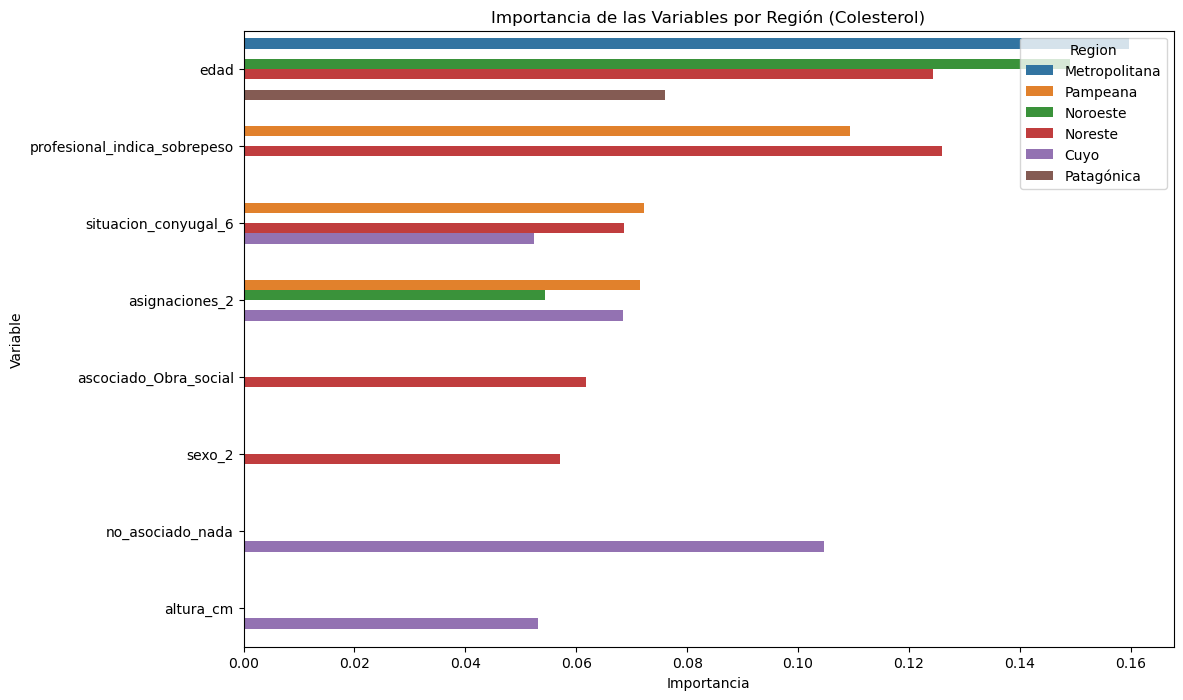

In [61]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', hue='Region', data=importancias_colesterol_df_mejorado)
plt.title('Importancia de las Variables por Región (Colesterol)')
plt.show()

### Conclusiones
1. Nuevamente aparecen la edad y el sobrepeso como causas más importantes
2. En la región pampeana y noroeste resulta importante la variable actualmente_fuma_cigarrillos
3. Aparece la variable ansiedad_depresion en la region de cuyo
4. En la regipon metropolitana aparece una distinción de acuerdo al sexo
5. La situación conyugal es significativa en el noroeaste y el noreste


## Parametros más importantes en el modelo con hiperparámetros mejorados para la hipertensión


In [62]:

# Crear un DataFrame vacío para almacenar las importancias
importancias_hipertension_df_mejorado = pd.DataFrame(columns=['Region', 'Variable', 'Importancia'])


for region, importancias in importancia_por_region.items():
    # Obtener la importancia de colesterol de la región actual
    importances_hip = importancias['hipertension']
    
    # Obtener el DataFrame de la región actual para obtener los nombres de las columnas
    df_region = dfs_por_region[region]
    X_region = df_region.iloc[:, 1:-3]
    columnas_originales = X_region.columns
    
    # Ordenar los índices de las importancias de mayor a menor
    indices_ordenados = np.argsort(importances_hip)[::-1]
    
    # Obtener el nombre de la región
    nombre_region = region_dict.get(region, f"Región {region}")
    
    # Imprimir los resultados
    print(f"Región: {nombre_region}")
    for i in indices_ordenados:
        if importances_hip[i] > 0.05:  # solo imprimo columnas con importancia mayor a 0
                    
            print(f"{columnas_originales[i]}: {importances_hip[i]:.4f}")
            
            importancias_hipertension_df_mejorado = importancias_hipertension_df_mejorado.append({
                'Region': nombre_region,
                'Variable': columnas_originales[i],
                'Importancia': importances_hip[i]     
            }, ignore_index=True)
            
    print("\n") 



Región: Metropolitana
edad: 0.2040
situacion_conyugal_6: 0.0932
peso_kg: 0.0609


Región: Pampeana
edad: 0.3180
peso_kg: 0.0757
altura_cm: 0.0610
ingresos: 0.0604
profesional_indica_sobrepeso: 0.0515


Región: Noroeste
edad: 0.0777
profesional_indica_sobrepeso: 0.0527
situacion_conyugal_6: 0.0506


Región: Noreste
edad: 0.2430
profesional_indica_sobrepeso: 0.0800
situacion_conyugal_5: 0.0672


Región: Cuyo
edad: 0.2870
peso_kg: 0.0868
profesional_indica_sobrepeso: 0.0637
promedio_fv_diario: 0.0531
altura_cm: 0.0513


Región: Patagónica
edad: 0.1757




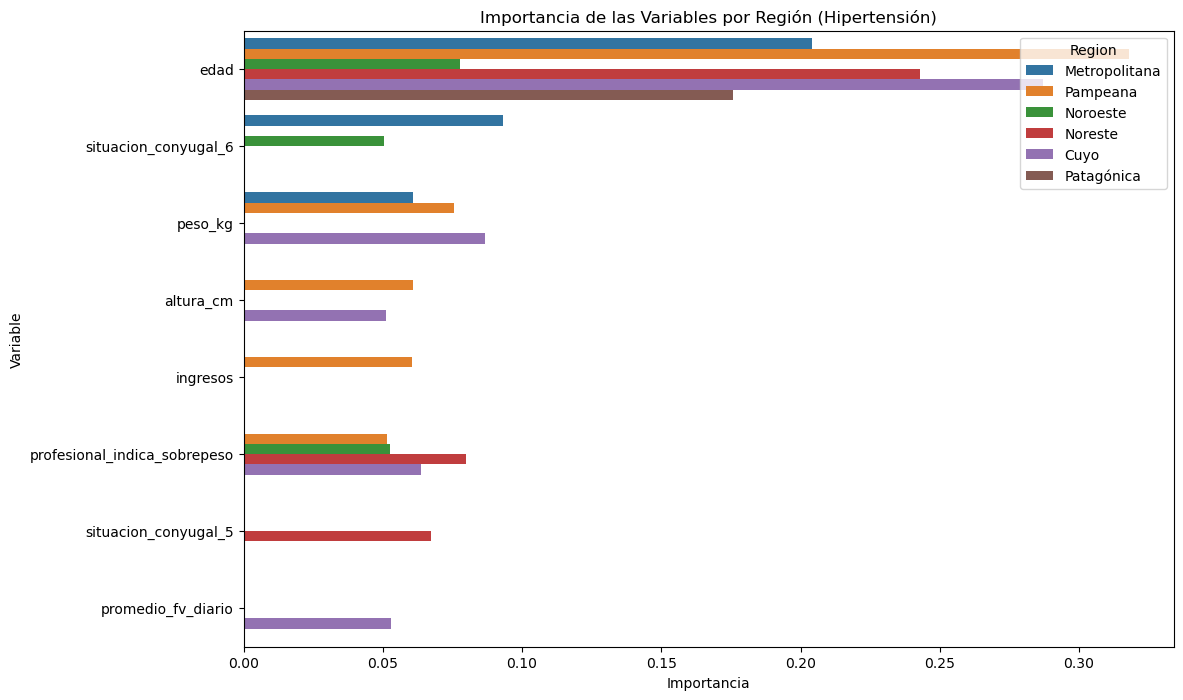

In [63]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', hue='Region', data=importancias_hipertension_df_mejorado)
plt.title('Importancia de las Variables por Región (Hipertensión)')
plt.show()

### Conclusiones
1. Se repiten como más importantes las características de edad y sobrepeso (o la variable peso) en la mayoría de las regiones 
2. El tipo de alimentación es importante en la regipon patagónica
3. EN la región metropolitana y cuyo aparece la variable fuma_Actualmente_cigarrillos
4. El nivel de ingresos es significativo en la regipon pampeana

## Parametros más importantes en el modelo con hiperparámetros mejorados para la diabetes

In [45]:

# Crear un DataFrame vacío para almacenar las importancias
importancias_diabetes_df_mejorado = pd.DataFrame(columns=['Region', 'Variable', 'Importancia'])

for region, importancias in importancia_por_region.items():
    # Obtener la importancia de diabetes de la región actual
    importances_dia = importancias['diabetes']
    
    # Obtener el DataFrame de la región actual para obtener los nombres de las columnas
    df_region = dfs_por_region[region]
    X_region = df_region.iloc[:, 1:-3]
    columnas_originales = X_region.columns
    
    # Ordenar los índices de las importancias de mayor a menor
    indices_ordenados = np.argsort(importances_dia)[::-1]
    
    # Obtener el nombre de la región
    nombre_region = region_dict.get(region, f"Región {region}")
    
   
    
    # Imprimir los resultados
    print(f"Región: {nombre_region}")
    for i in indices_ordenados:
        if importances_dia[i] > 0.05:  # solo imprimo columnas con importancia mayor a 0
            print(f"{columnas_originales[i]}: {importances_dia[i]:.4f}")
            
            importancias_diabetes_df_mejorado = importancias_diabetes_df_mejorado.append({
                'Region': nombre_region,
                'Variable': columnas_originales[i],
                'Importancia': importances_dia[i]     
            }, ignore_index=True)
    print("\n")


Región: Metropolitana
familiares_directos_diabetes_2: 0.1054
edad_fumo_primera_vez: 0.0514


Región: Pampeana
familiares_directos_diabetes_2: 0.1413
situacion_conyugal_6: 0.0515


Región: Noroeste
familiares_directos_diabetes_2: 0.0750
situacion_conyugal_6: 0.0560


Región: Noreste
familiares_directos_diabetes_2: 0.0995
edad: 0.0863
af_fue_traslado: 0.0659


Región: Cuyo
familiares_directos_diabetes_2: 0.1372


Región: Patagónica
familiares_directos_diabetes_2: 0.0746
sexo_2: 0.0542
profesional_indica_sobrepeso: 0.0513




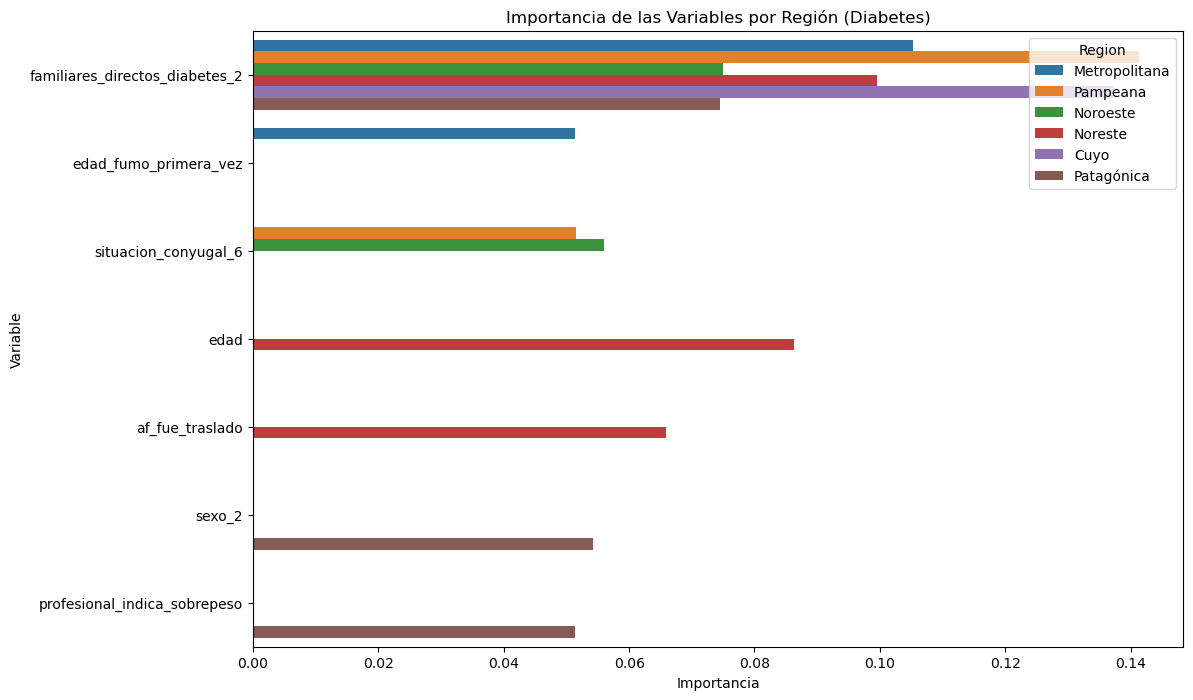

In [46]:


plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', hue='Region', data=importancias_diabetes_df_mejorado)
plt.title('Importancia de las Variables por Región (Diabetes)')
plt.show()

### Conclusiones
1. La variable edad desaparece en los valores mas significativos de las regiones NORESTE y NOROESTE
2. EL alcohol y cigarrillos aparecen en la regipon patagónica
3. La actividad física intensa en significativo en cuyo
4. Familiares directos con diabetes solo aparece en el NOROESTE y si aparece en otras regiones la variable familiares no directos con diabetes
5. El nivel de instrucción y tipo de hogar son significativos en el NORESTE


# CONCLUSIONES GENERALES

Se evaluará otro algoritmo que no sea arboles de decisión para el ajuste